# Treinando e Visualizando uma Árvore de Decisão.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd

* Uma outra forma de criar uma árvore de decisão:

Acurácia: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



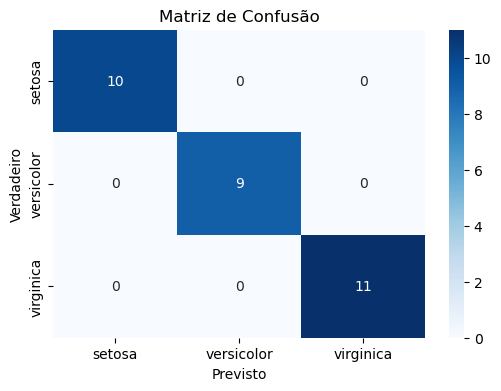

In [ ]:
# 🌸 2️⃣ Carregar e preparar os dados

Iris = load_iris()
X2 =Iris.data # features (comprimento e largura de pétalas e sépalas)
y2 =Iris.target # classes (setosa, versicolor, virginica)

# Dividir em treino e teste (80% treino, 20% teste):
X_train, X_test, y_train, y_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

# 🌳 3️⃣ Criar e treinar o modelo de Árvore de Decisão

# Criar o modelo:
arvore_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)

# Treinar o modelo:
arvore_clf.fit(X_train, y_train)

# 🌿 4️⃣ Fazer previsões e avaliar o desempenho

# Fazer previsões no conjunto de teste:
y_pred = arvore_clf.predict(X_test)

# Avaliar o modelo:
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia: {acc:.2f}")

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=Iris.target_names))

# Matriz de confusão:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues",
            xticklabels=Iris.target_names, yticklabels=Iris.target_names)
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.show()

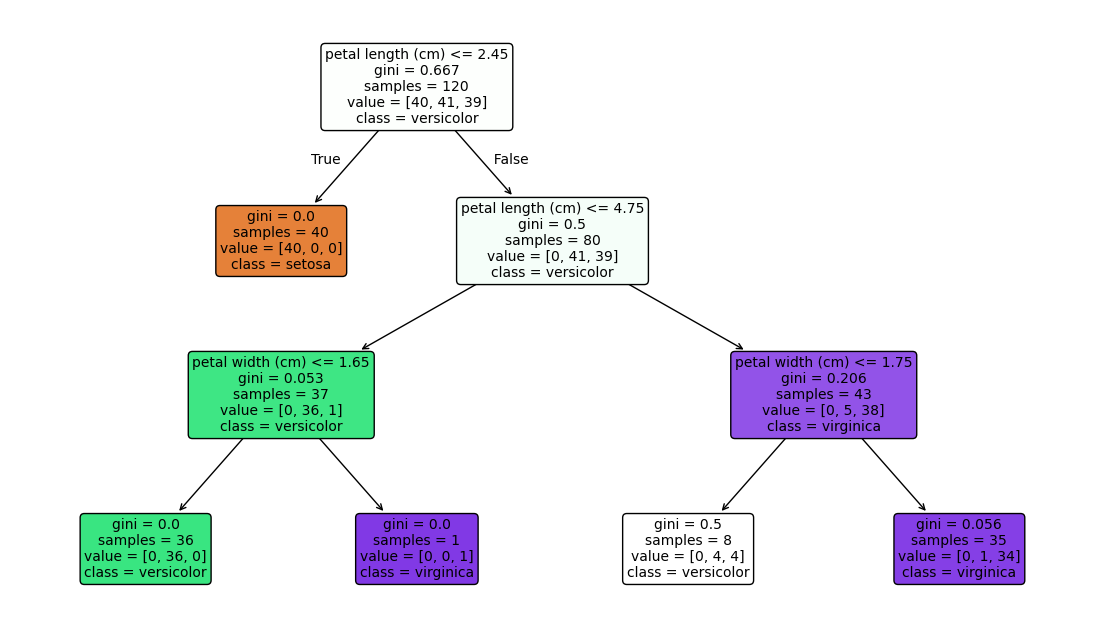

In [5]:
# 🌲 5️⃣ Visualizar a Árvore de Decisão

plt.figure(figsize=(14,8))
plot_tree(
    arvore_clf,
    feature_names=Iris.feature_names,
    class_names=Iris.target_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

* Versão robusta:

=== ANÁLISE EXPLORATÓRIA DO DATASET IRIS ===
📊 Shape do dataset: (150, 4)
🌸 Classes: ['setosa' 'versicolor' 'virginica']
🔍 Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 📈 Estatísticas Descritivas


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00



🎯 Distribuição das classes:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


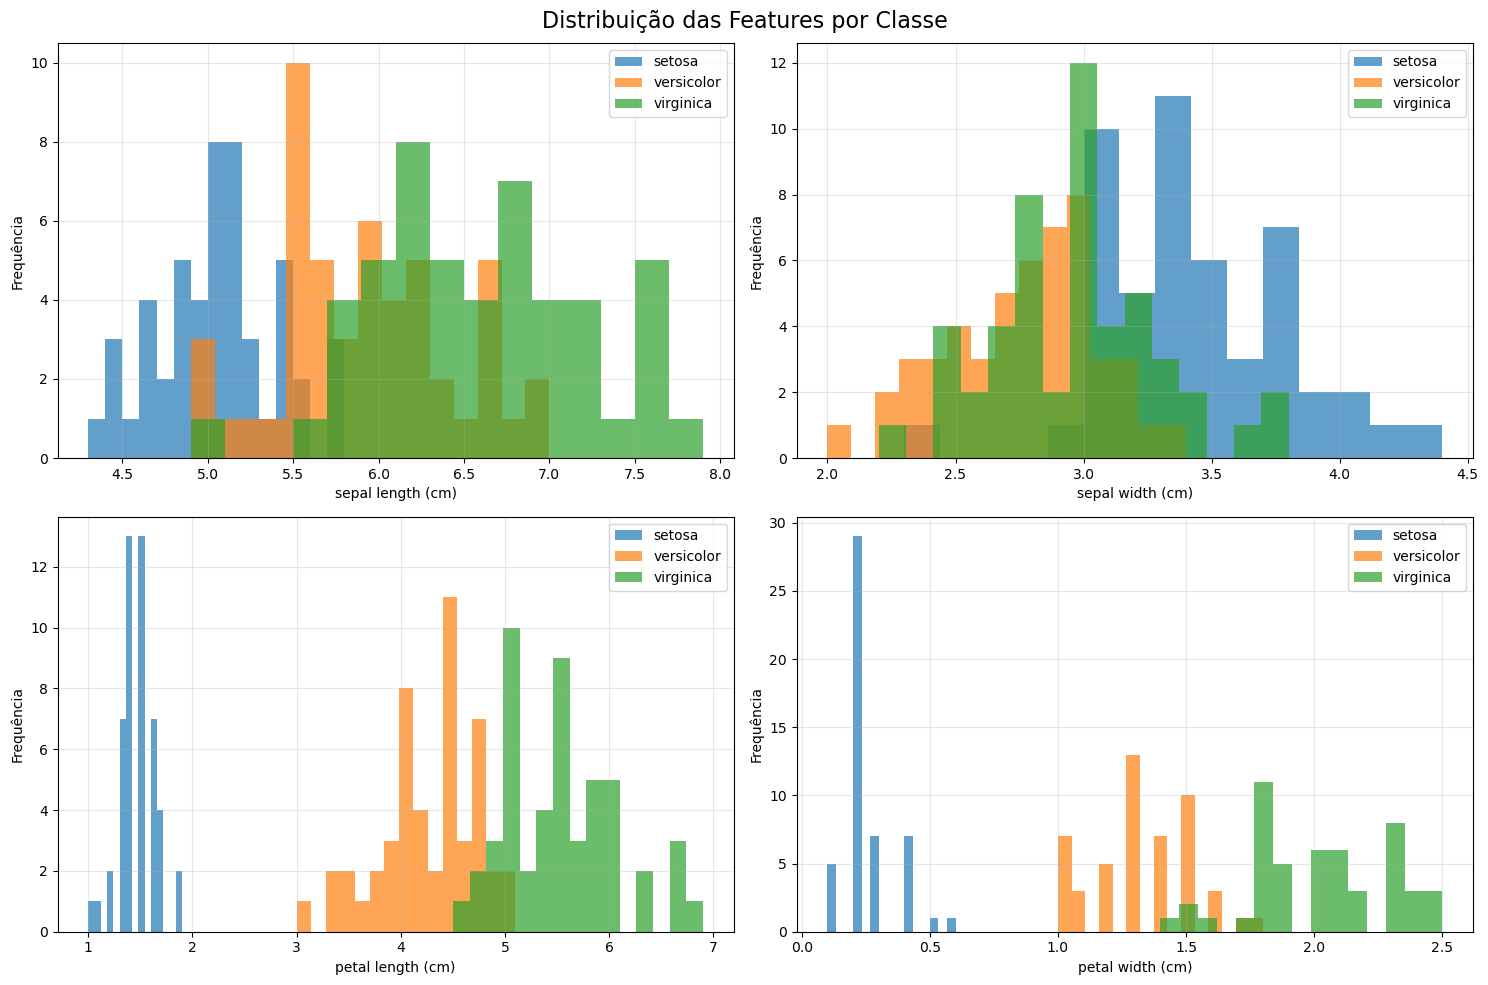

In [6]:
# 🌸 1️⃣ ANÁLISE EXPLORATÓRIA COMPLETA
print("=== ANÁLISE EXPLORATÓRIA DO DATASET IRIS ===")

iris = load_iris()
X = iris.data 
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Criar DataFrame para análise:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = [target_names[i] for i in y]

print(f"📊 Shape do dataset: {X.shape}")
print(f"🌸 Classes: {target_names}")
print(f"🔍 Features: {feature_names}")

# Estatísticas descritivas:
print(f"\n 📈 Estatísticas Descritivas")
display(df.describe().round(2))

# Distribuição das classes:
print(f"\n🎯 Distribuição das classes:")
print(df['species'].value_counts())

# Visualização da distribuição das features por classe:
plt.figure(figsize=(15, 10))

# Pairplot para ver relações entre features:
for i, feature in enumerate(feature_names):
    plt.subplot(2, 2, i+1)
    for class_idx, class_name in enumerate(target_names):
        class_data = df[df['target'] == class_idx][feature]
        plt.hist(class_data, alpha=0.7, label=class_name, bins=15)
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.legend()
    plt.grid(True, alpha=0.3)
plt.suptitle('Distribuição das Features por Classe', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# 🌸 2️⃣ DIVISÃO ESTRATIFICADA DOS DADOS

X_train, X_test, y_train, y_test, = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y # IMPORTANTE: mantém proporção das classes
)

print(f"\n=== DIVISÃO DOS DADOS ===")
print(f"📚 Treino: {X_train.shape[0]} amostras")
print(f"🧪 Teste: {X_test.shape[0]} amostras")
print(f"Proporção das classes no treino: {np.bincount(y_train)}")
print(f"Proporção das classes no teste: {np.bincount(y_test)}")


=== DIVISÃO DOS DADOS ===
📚 Treino: 120 amostras
🧪 Teste: 30 amostras
Proporção das classes no treino: [40 40 40]
Proporção das classes no teste: [10 10 10]


In [8]:
# 🌳 3️⃣ OTIMIZAÇÃO DE HIPERPARÂMETROS

print("\n=== OTIMIZAÇÃO DE HIPERPARÂMETROS ===")

# Grade de parâmetros para encontrar os melhores:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Busca em grade com validação cruzada:
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("✅ Melhores parâmetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"   {param}: {value}")

print(f"🎯 Melhor acurácia na validação cruzada: {grid_search.best_score_:.3f}")


=== OTIMIZAÇÃO DE HIPERPARÂMETROS ===
✅ Melhores parâmetros encontrados:
   criterion: gini
   max_depth: 4
   min_samples_leaf: 1
   min_samples_split: 2
🎯 Melhor acurácia na validação cruzada: 0.942


In [9]:
# 🌳 4️⃣ MODELO FINAL COM MELHORES PARÂMETROS

arvore_classi = grid_search.best_estimator_

# Treinar o modelo final:
arvore_classi.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)


=== AVALIAÇÃO DO MODELO ===
🎯 Acurácia no teste: 0.933
📊 Acurácia média na validação cruzada: 0.942 (±0.041)

📋 Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



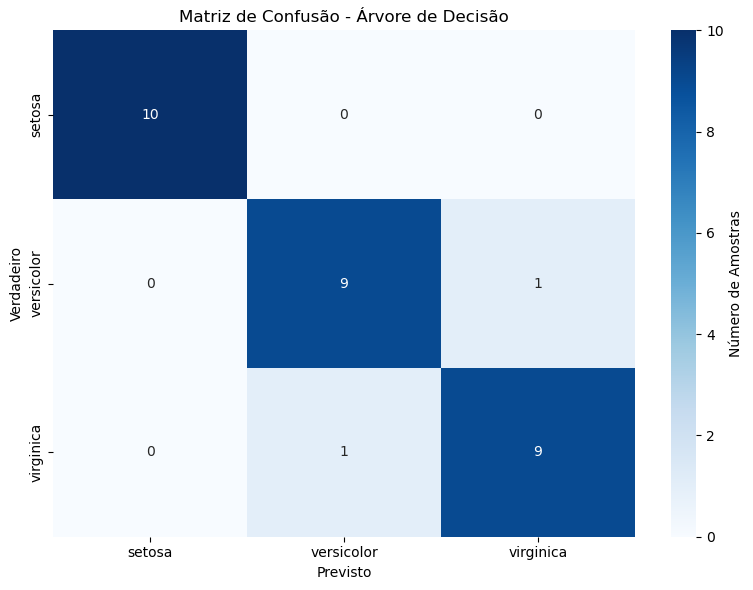

In [10]:
# 🌿 5️⃣ AVALIAÇÃO COMPLETA DO MODELO

y_pred = arvore_classi.predict(X_test)
y_pred_proba = arvore_classi.predict_proba(X_test) # Probabilidades

acc = accuracy_score(y_test, y_pred)

print(f"\n=== AVALIAÇÃO DO MODELO ===")
print(f"🎯 Acurácia no teste: {acc:.3f}")

# Validação cruzada adicional para robustez:
cv_scores = cross_val_score(arvore_classi, X_train, y_train, cv=5)
print(f"📊 Acurácia média na validação cruzada: {cv_scores.mean():.3f} (±{cv_scores.std() * 2:.3f})")

print("\n📋 Relatório de Classificação Detalhado:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Matriz de confusão melhorada:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=target_names, 
            yticklabels=target_names,
            cbar_kws={'label': 'Número de Amostras'})
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão - Árvore de Decisão")
plt.tight_layout()
plt.show()

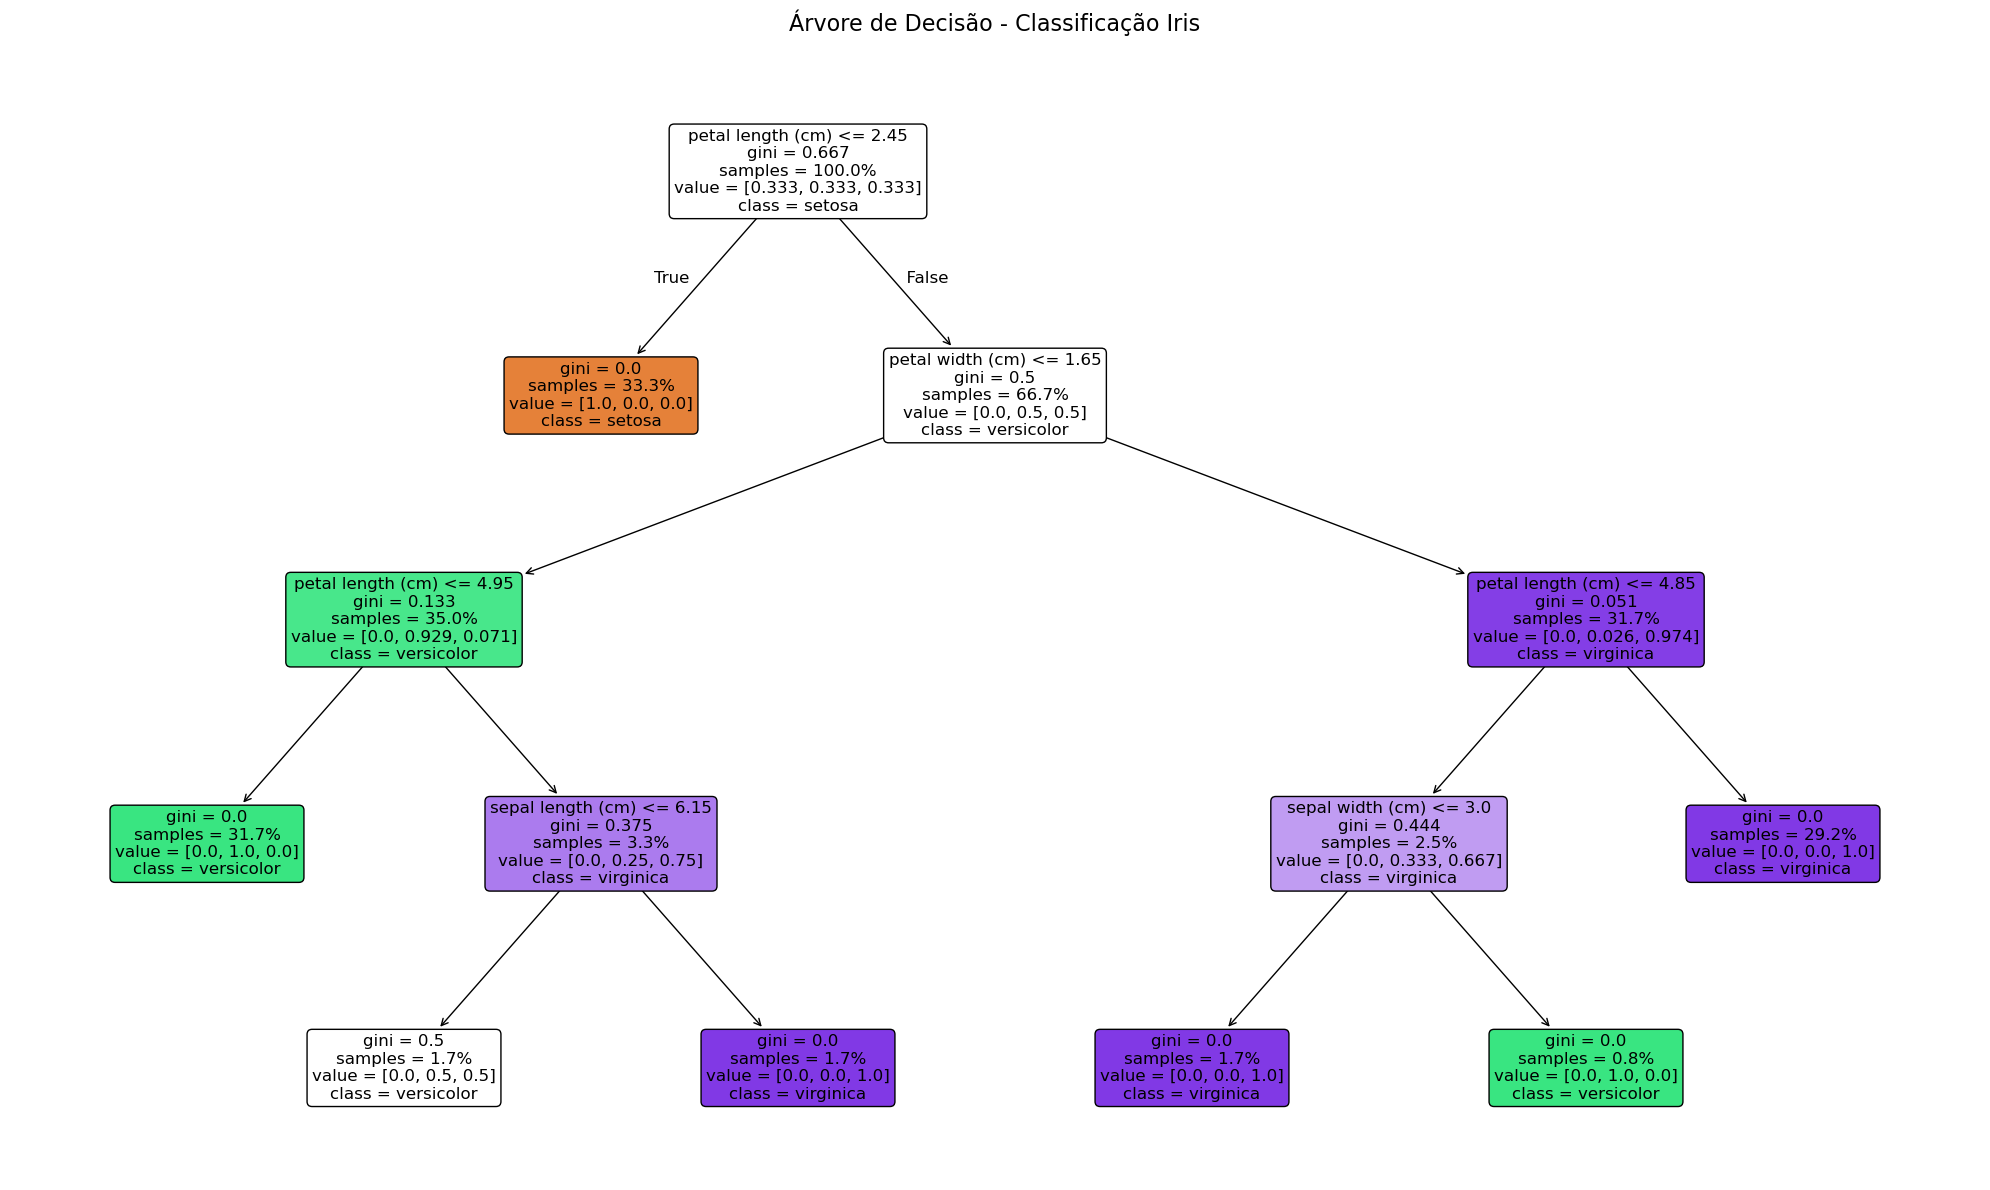

In [11]:
# 🌲 6️⃣ VISUALIZAÇÃO DA ÁRVORE

plt.figure(figsize=(20, 12))
plot_tree(
    arvore_classi,
    feature_names=feature_names,
    class_names=target_names,
    filled=True,
    rounded=True,
    fontsize=12,
    proportion=True,  # Mostra proporções nas folhas
    impurity=True     # Mostra impureza de Gini/Entropy
)
plt.title("Árvore de Decisão - Classificação Iris", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [12]:
# 📊 7️⃣ RELATÓRIO FINAL COMPLETO

print("\n" + "="*60)
print("RELATÓRIO FINAL - ÁRVORE DE DECISÃO IRIS")
print("="*60)

print(f"🎯 PERFORMANCE:")
print(f"   • Acurácia no teste: {acc:.3f}")
print(f"   • Acurácia CV: {cv_scores.mean():.3f}")

print(f"\n🌳 ESTRUTURA DA ÁRVORE:")
print(f"   • Profundidade: {arvore_classi.get_depth()}")
print(f"   • Número de folhas: {arvore_classi.get_n_leaves()}")

print(f"\n🎨 PARÂMETROS OTIMIZADOS:")
for param, value in grid_search.best_params_.items():
    print(f"   • {param}: {value}")

print("="*60)


RELATÓRIO FINAL - ÁRVORE DE DECISÃO IRIS
🎯 PERFORMANCE:
   • Acurácia no teste: 0.933
   • Acurácia CV: 0.942

🌳 ESTRUTURA DA ÁRVORE:
   • Profundidade: 4
   • Número de folhas: 7

🎨 PARÂMETROS OTIMIZADOS:
   • criterion: gini
   • max_depth: 4
   • min_samples_leaf: 1
   • min_samples_split: 2
